# Importing necessary Packages

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import seaborn as sns
sns.set()
import string
import plotly.express as px

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Reading the Data Dictonary file to understand the data
data = pd.read_excel("data dictionary.xlsx")
data

,Attribute,Description
0,Name,The brand and model of the car
1,Location,The location in which the car is being sold or...
2,Year,The year or edition of the model
3,Kilometers_Driven,The total kilometers driven in the car by the ...
4,Fuel_Type,The type of fuel used by the car
5,Transmission,The type of transmission used by the car
6,Owner_Type,"Whether the ownership is Firsthand, Second han..."
7,Mileage,The standard mileage offered by the car compan...
8,Engine,The displacement volume of the engine in cc
9,Power,The maximum power of the engine in bhp


### Reading the Train and Test data


In [5]:
car_train = pd.read_csv("train.csv")
car_test = pd.read_csv("test.csv")

In [6]:
car_train = car_train.iloc[:,1:]

In [7]:
car_test = car_test.iloc[:,1:]

In [8]:
car_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Getting the Shape of the Data

In [9]:
car_train.shape

(6019, 13)

## Checking the Datatypes of the Features and Other information of the Dataset 

In [10]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


## Duplicacy Check

In [11]:
car_train.duplicated().sum()

0

## Unique Values Check

In [12]:
for i in car_train.columns:
    print(f'No of Unique values in {i} is: {car_train[i].nunique()}')

No of Unique values in Name is: 1876
No of Unique values in Location is: 11
No of Unique values in Year is: 22
No of Unique values in Kilometers_Driven is: 3093
No of Unique values in Fuel_Type is: 5
No of Unique values in Transmission is: 2
No of Unique values in Owner_Type is: 4
No of Unique values in Mileage is: 442
No of Unique values in Engine is: 146
No of Unique values in Power is: 372
No of Unique values in Seats is: 9
No of Unique values in New_Price is: 540
No of Unique values in Price is: 1373


## Null Values 

In [13]:
print("The Missing value percentage in each column is as follows:")
sort=round(car_train.isnull().sum().sort_values(ascending=False)/len(car_train)*100,2)
print(sort)

The Missing value percentage in each column is as follows:
New_Price            86.31
Seats                 0.70
Engine                0.60
Power                 0.60
Mileage               0.03
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Price                 0.00
dtype: float64


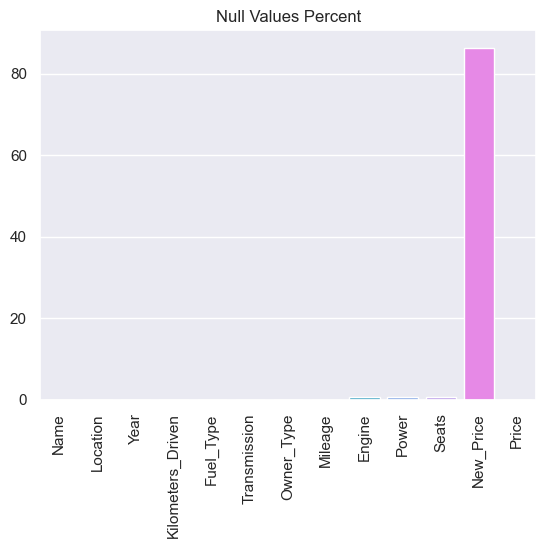

In [14]:
sns.barplot(y=round(car_train.isnull().sum()/len(car_train)*100,2),x=car_train.columns)
plt.xticks(rotation=90)
plt.title("Null Values Percent")
plt.show()

## Cleaning the Data

In [15]:
car_train["Name"][0]

'Maruti Wagon R LXI CNG'

In [16]:
car_train["Name"][10]

'Maruti Ciaz Zeta'

In [17]:
def get_brand(s):
    return s.split()[0]
def get_model(s):
    return s.split()[1]

In [18]:
car_train["Brand"]=car_train["Name"].apply(get_brand)
car_train["Model"]=car_train["Name"].apply(get_model)

In [19]:
car_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4


In [20]:
def column_analysis(data):
    ana = data.str.findall('[a-zA-z]+')
    ana=[i[0] for i in ana if i is not np.nan]
    return set(ana)

In [21]:
column_analysis(car_train["Mileage"])

{'km', 'kmpl'}

In [22]:
column_analysis(car_train["Engine"])

{'CC'}

In [23]:
column_analysis(car_train["Power"])

{'bhp', 'null'}

In [24]:
column_analysis(car_train["New_Price"])

{'Cr', 'Lakh'}

In [25]:
def convert_milage(data):
    if type(data) == str:
        data=data.lower()
        if 'kmpl' in data:
            data=data.strip('kmpl')
        if 'km/kg' in data:
            data=data.strip('km/kg')
            data=float(data)*1.8
    return data

In [26]:
car_train["Mileage(kmpl)"]=car_train["Mileage"].apply(convert_milage)

In [27]:
car_train["Engine"]=car_train["Engine"].str.strip('CC')

In [28]:
car_train["Power"]=car_train["Power"].str.strip('bhp')

In [29]:
car_train["Power(bhp)"]=car_train["Power"]

In [30]:
car_train["Engine(CC)"]=car_train["Engine"]

In [31]:
def price_converted(data):
    if type(data)==str:
        data=data.lower()
        if 'lakh' in data:
            data=data.strip('lakh')
        if 'cr' in data:
            data=data.strip('cr')
            data=float(data)*100
    return(data)

In [32]:
car_train["New_Price(Lakhs)"]=car_train["New_Price"].apply(price_converted)

In [33]:
car_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Mileage(kmpl)', 'Power(bhp)',
       'Engine(CC)', 'New_Price(Lakhs)'],
      dtype='object')

In [34]:
car_train.drop(columns=['Name','Mileage','Engine','Power','New_Price'],axis=1,inplace=True)

In [35]:
car_train.describe(include='all')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage(kmpl),Power(bhp),Engine(CC),New_Price(Lakhs)
count,6019,6019.000000,6.019000e+03,6019,6019,6019,5977.000000,6019.000000,6019,6019,6017,5983,5983,824
unique,11,NaN,NaN,5,2,4,NaN,NaN,31,212,442,372,146,540
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,Maruti,Swift,18.9,74,1197,95.13
freq,790,NaN,NaN,3205,4299,4929,NaN,NaN,1211,353,172,235,606,6
mean,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,5.278735,9.479468,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,0.808840,11.187917,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,0.440000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,5.000000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,5.000000,5.640000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,5.000000,9.950000,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
car_train["Year"]=car_train["Year"].astype(str)
car_train["Seats"]=car_train["Seats"].astype(str)
car_train["Mileage(kmpl)"]=car_train["Mileage(kmpl)"].astype(float)
car_train["Power(bhp)"]=pd.to_numeric(car_train["Power(bhp)"],errors='coerce')
car_train["Engine(CC)"]=car_train["Engine(CC)"].astype(float)
car_train["New_Price(Lakhs)"]=car_train["New_Price(Lakhs)"].astype(float)

In [37]:
car_train.describe(include='all')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage(kmpl),Power(bhp),Engine(CC),New_Price(Lakhs)
count,6019,6019,6.019000e+03,6019,6019,6019,6019,6019.000000,6019,6019,6017.000000,5876.000000,5983.000000,824.000000
unique,11,22,NaN,5,2,4,10,NaN,31,212,NaN,NaN,NaN,NaN
top,Mumbai,2014,NaN,Diesel,Manual,First,5.0,NaN,Maruti,Swift,NaN,NaN,NaN,NaN
freq,790,797,NaN,3205,4299,4929,5014,NaN,1211,353,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.873838e+04,NaN,NaN,NaN,NaN,9.479468,NaN,NaN,18.349986,113.253050,1621.276450,23.075655
std,NaN,NaN,9.126884e+04,NaN,NaN,NaN,NaN,11.187917,NaN,NaN,5.370554,53.874957,601.355233,26.182412
min,NaN,NaN,1.710000e+02,NaN,NaN,NaN,NaN,0.440000,NaN,NaN,0.000000,34.200000,72.000000,3.910000
25%,NaN,NaN,3.400000e+04,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,15.260000,75.000000,1198.000000,7.977500
50%,NaN,NaN,5.300000e+04,NaN,NaN,NaN,NaN,5.640000,NaN,NaN,18.190000,97.700000,1493.000000,11.670000
75%,NaN,NaN,7.300000e+04,NaN,NaN,NaN,NaN,9.950000,NaN,NaN,21.100000,138.100000,1984.000000,26.560000


In [38]:
numerical_col=[]
category_col=[]
for i in car_train.columns:
    if car_train[i].dtype=='O':
        category_col.append(i)
    else:
        numerical_col.append(i)

## Unvariate Analysis

In [39]:
# Checking unique values in categorical columns
def unique_values(col):
    return car_train[col].unique()

for i in category_col:
    print(f'The unique values in {i} column is: {unique_values(i)}')
    print('')

The unique values in Location column is: ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

The unique values in Year column is: ['2010' '2015' '2011' '2012' '2013' '2016' '2018' '2014' '2017' '2007'
 '2009' '2008' '2019' '2006' '2005' '2004' '2002' '2000' '2003' '1999'
 '2001' '1998']

The unique values in Fuel_Type column is: ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

The unique values in Transmission column is: ['Manual' 'Automatic']

The unique values in Owner_Type column is: ['First' 'Second' 'Fourth & Above' 'Third']

The unique values in Seats column is: ['5.0' '7.0' '8.0' '4.0' '6.0' '2.0' 'nan' '10.0' '9.0' '0.0']

The unique values in Brand column is: ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force

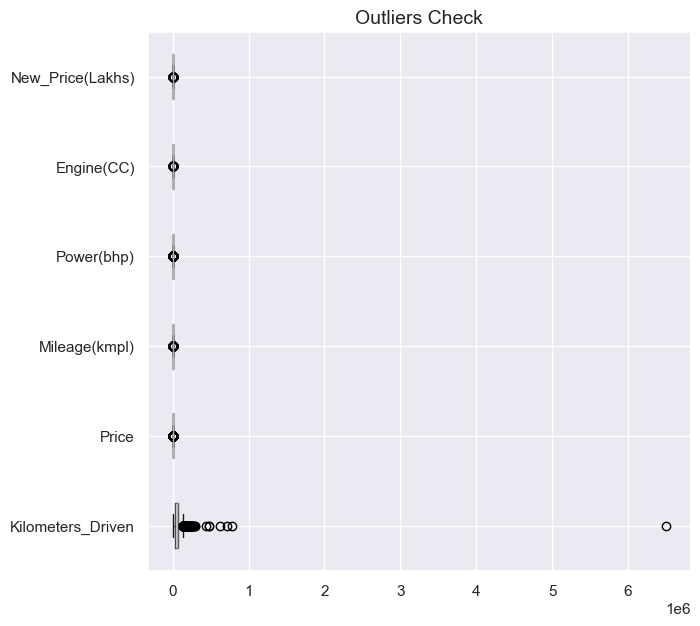

In [40]:
plt.figure(figsize=(7,7))
car_train[numerical_col].boxplot(vert=0)
plt.title("Outliers Check", fontsize=14)
plt.show()

In [41]:
car_train[numerical_col].max().sort_values(ascending =False)

Kilometers_Driven    6500000.000
Engine(CC)              5998.000
Power(bhp)               560.000
New_Price(Lakhs)         230.000
Price                    160.000
Mileage(kmpl)             60.372
dtype: float64

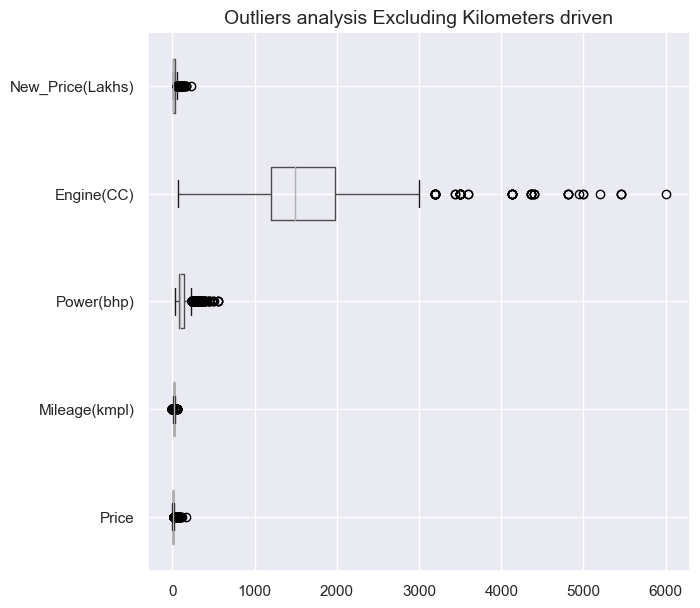

In [42]:
plt.figure(figsize=(7,7))
car_train[numerical_col].drop(["Kilometers_Driven"], axis=1).boxplot(vert=0)
plt.title("Outliers analysis Excluding Kilometers driven", fontsize=14)
plt.show()

In [43]:
def outlier_check(col):
    sns.boxplot(x=col,data=car_train)

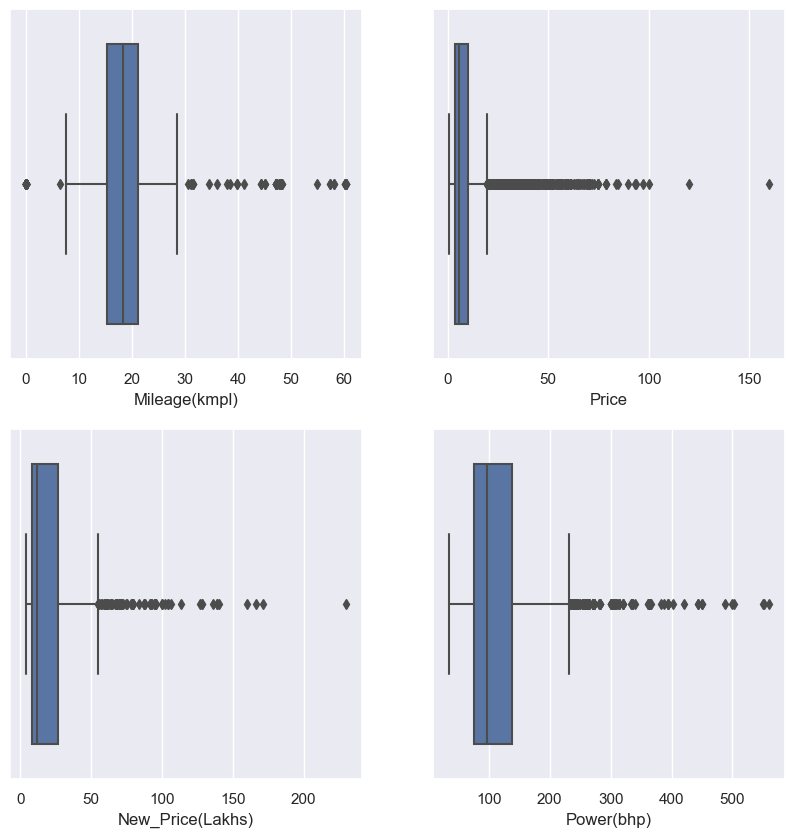

In [44]:
fig=plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
outlier_check('Mileage(kmpl)')
plt.subplot(2, 2, 2)
outlier_check('Price')
plt.subplot(2,2,3)
outlier_check('New_Price(Lakhs)')
plt.subplot(2,2,4)
outlier_check('Power(bhp)')


In [45]:
# Number of outliers in Numerical Columns
def chk_outliers(data, n):
    for i in data.columns:
        if data[i].dtype!='O':
            Q1 = data[i].quantile(0.25)
            Q3 = data[i].quantile(0.75)
            IQR = Q3 - Q1
            lower_range = Q1 - (n*IQR)
            upper_range = Q3 + (n*IQR)
            print(f'Number of outluiers in {i}: {data[(data[i]>upper_range)|(data[i]<lower_range)].shape[0]}' )
            print(f'Percent of outluiers in {i}: {str(round(data[(data[i]>upper_range)|(data[i]<lower_range)].shape[0]/len(data)*100,2))+"%"}')
            print()

In [46]:
chk_outliers(car_train, 1.5)

Number of outluiers in Kilometers_Driven: 202
Percent of outluiers in Kilometers_Driven: 3.36%

Number of outluiers in Price: 718
Percent of outluiers in Price: 11.93%

Number of outluiers in Mileage(kmpl): 125
Percent of outluiers in Mileage(kmpl): 2.08%

Number of outluiers in Power(bhp): 238
Percent of outluiers in Power(bhp): 3.95%

Number of outluiers in Engine(CC): 61
Percent of outluiers in Engine(CC): 1.01%

Number of outluiers in New_Price(Lakhs): 86
Percent of outluiers in New_Price(Lakhs): 1.43%



## Bi Variate Analysis

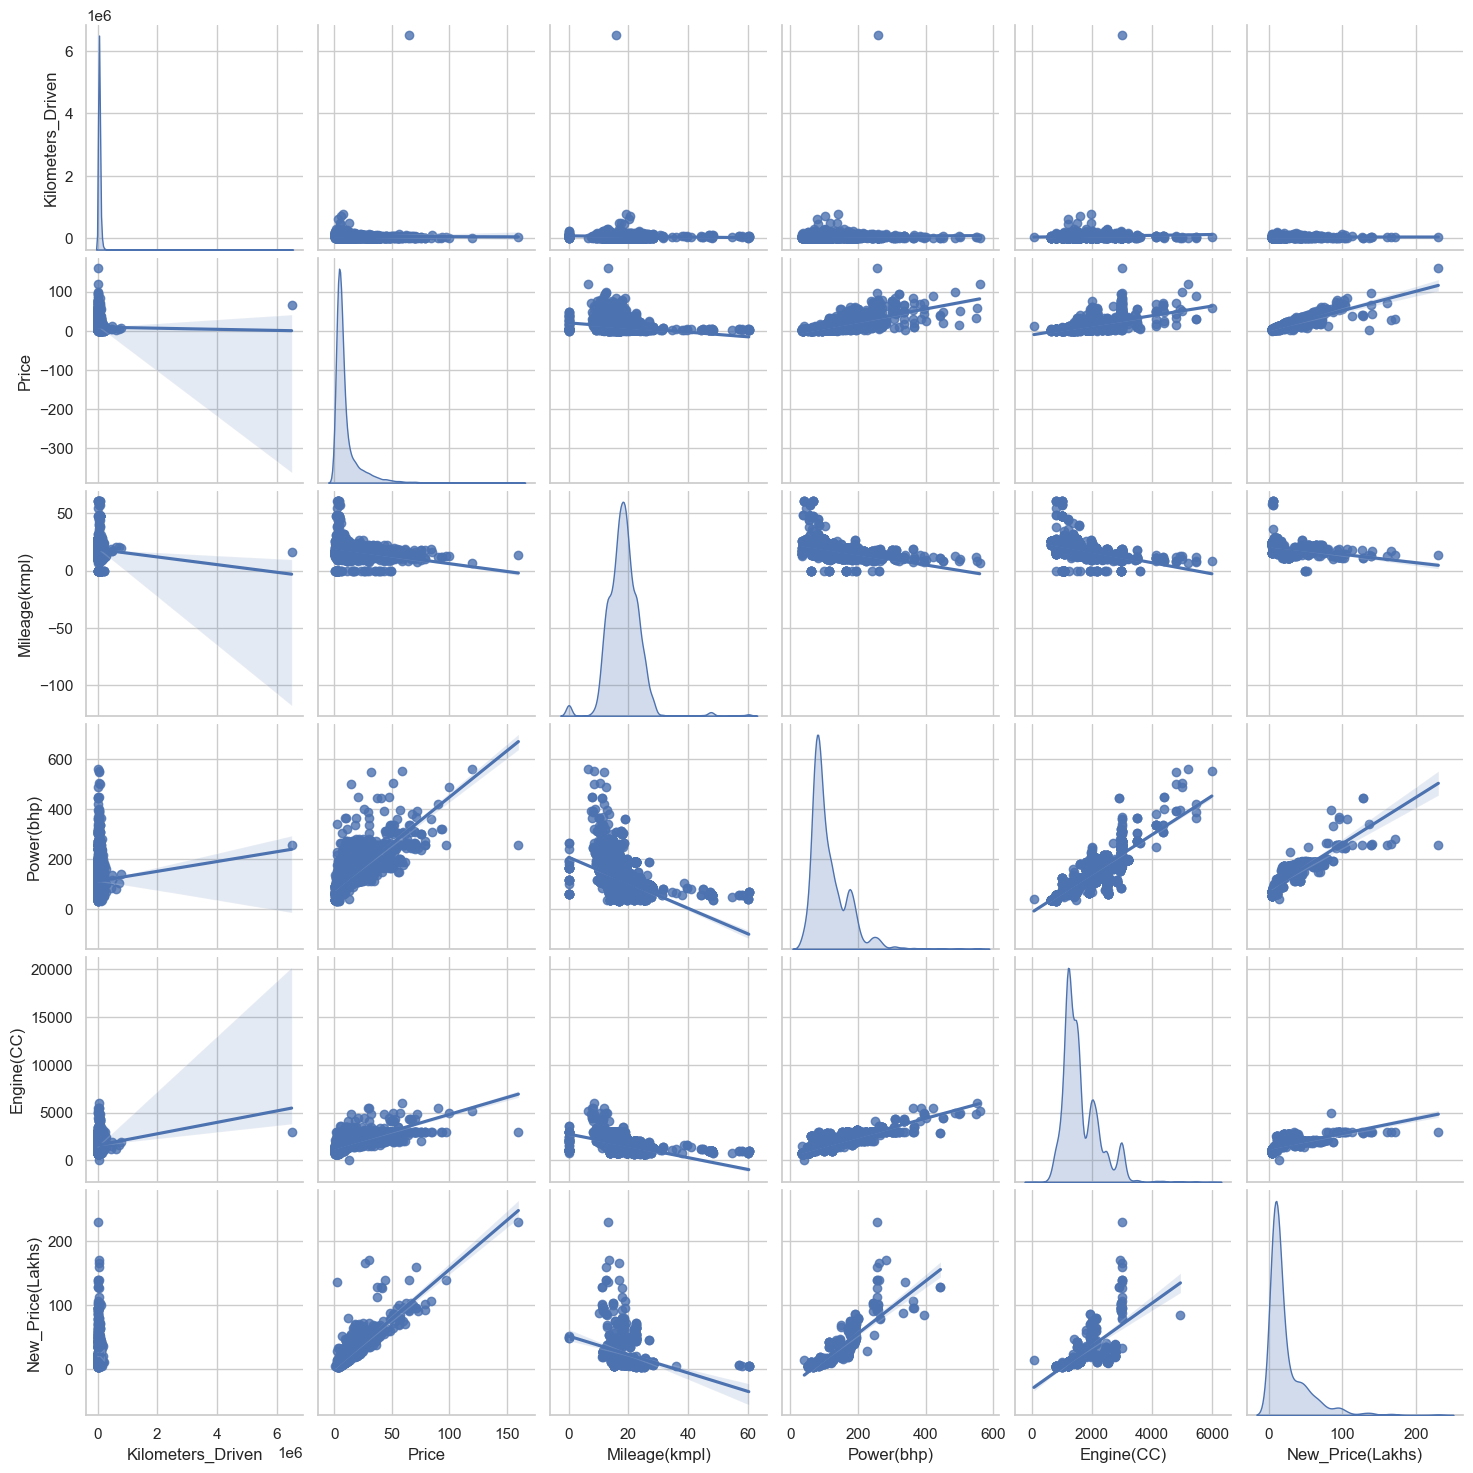

In [47]:
sns.set_style("whitegrid")
sns.pairplot(data=car_train,kind='reg',diag_kind='kde')

## Correlation Check

<Axes: >

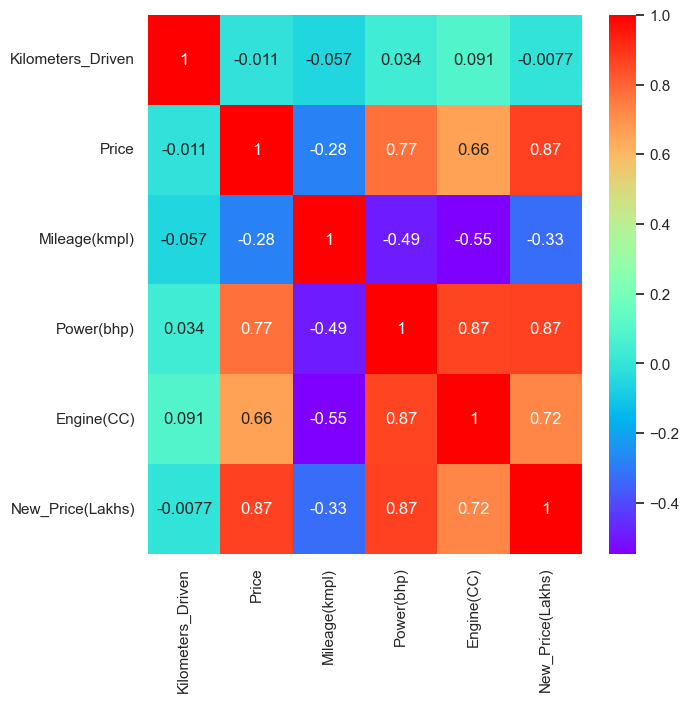

In [48]:
plt.figure(figsize=(7,7))
sns.heatmap(data=car_train.corr(), annot =True, cmap='rainbow')

In [49]:
car_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Brand', 'Model', 'Mileage(kmpl)',
       'Power(bhp)', 'Engine(CC)', 'New_Price(Lakhs)'],
      dtype='object')

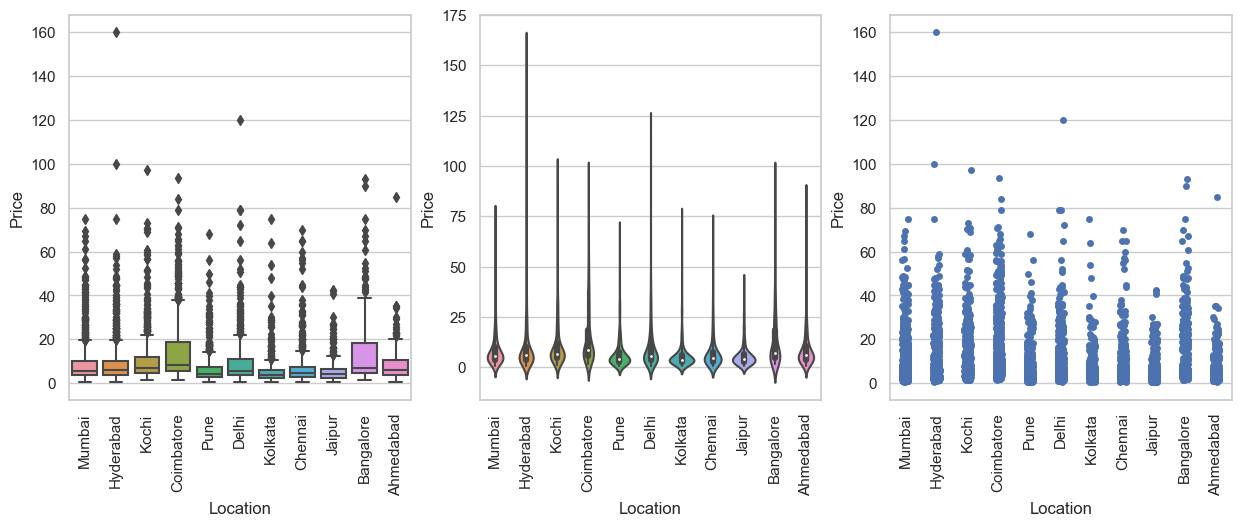

In [50]:
x='Location'
y='Price'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.violinplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.show()

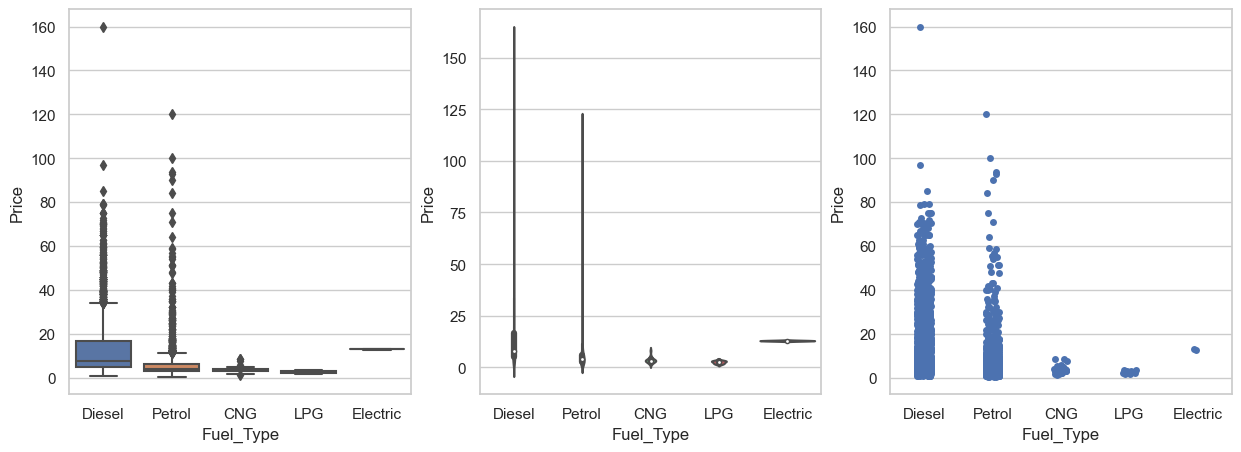

In [51]:
x='Fuel_Type'
y='Price'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,2)
sns.violinplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,3)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.show()

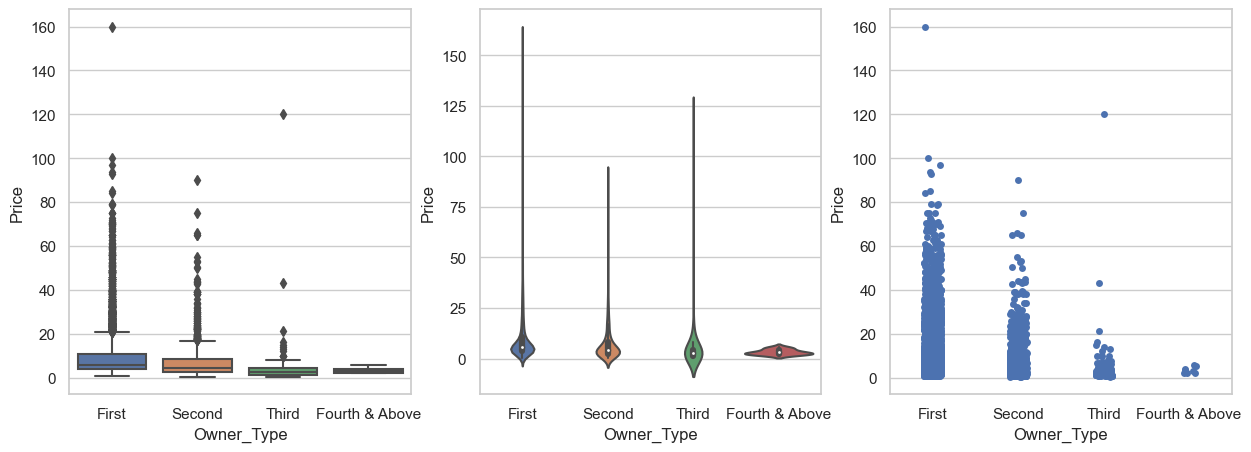

In [52]:
x='Owner_Type'
y='Price'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,2)
sns.violinplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,3)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.show()

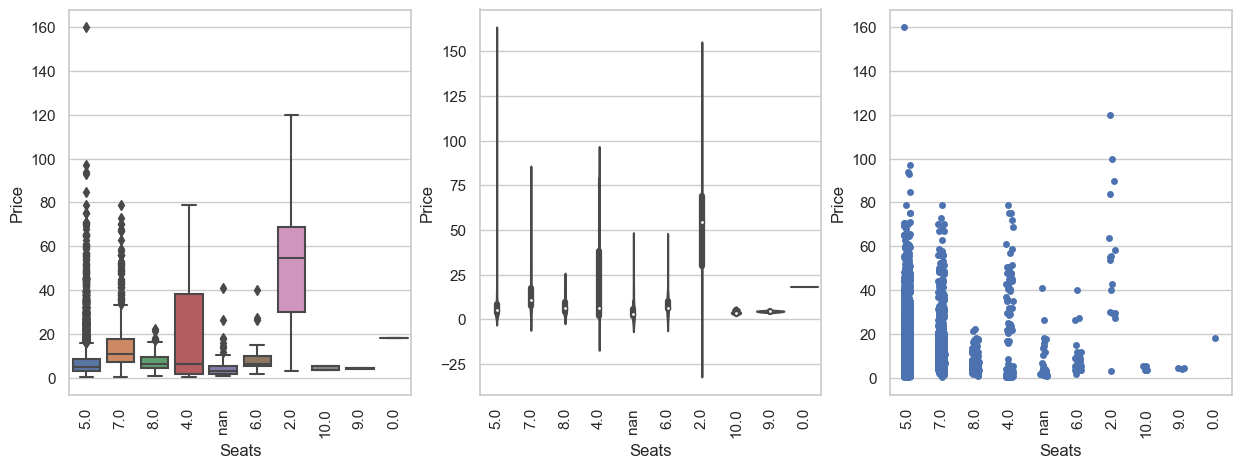

In [53]:
x='Seats'
y='Price'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.violinplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.show()

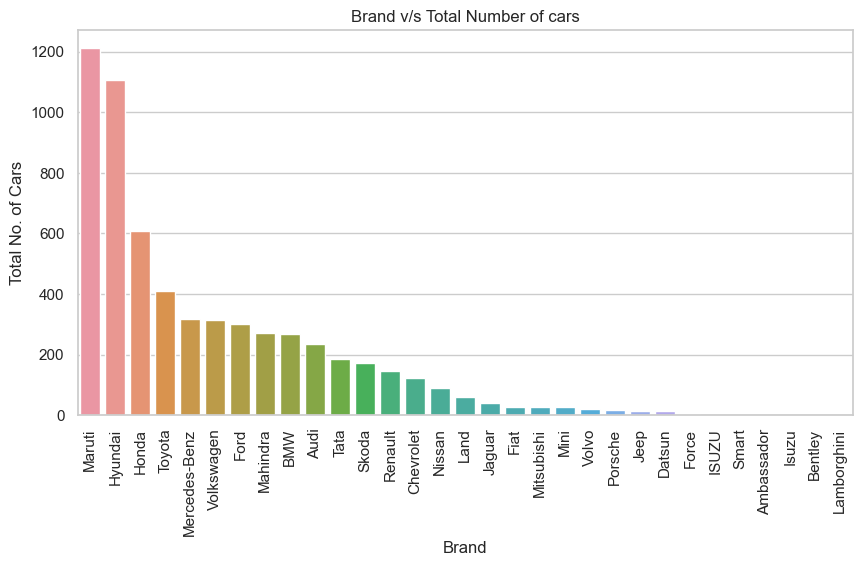

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(x=car_train["Brand"],order=car_train['Brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Brand v/s Total Number of cars")
plt.xlabel("Brand")
plt.ylabel("Total No. of Cars")
plt.show()

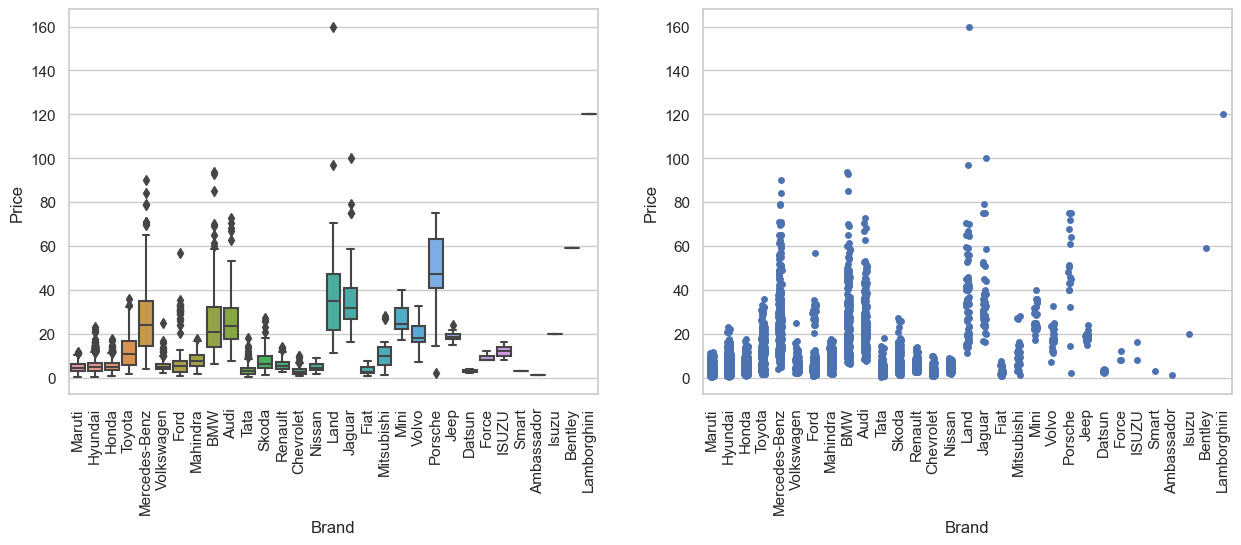

In [55]:
x='Brand'
y='Price'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
#plt.subplot(1,3,2)
# sns.violinplot(x=x,y=y,data=car_train,order=order)
# plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.xticks(rotation=90)
plt.show()

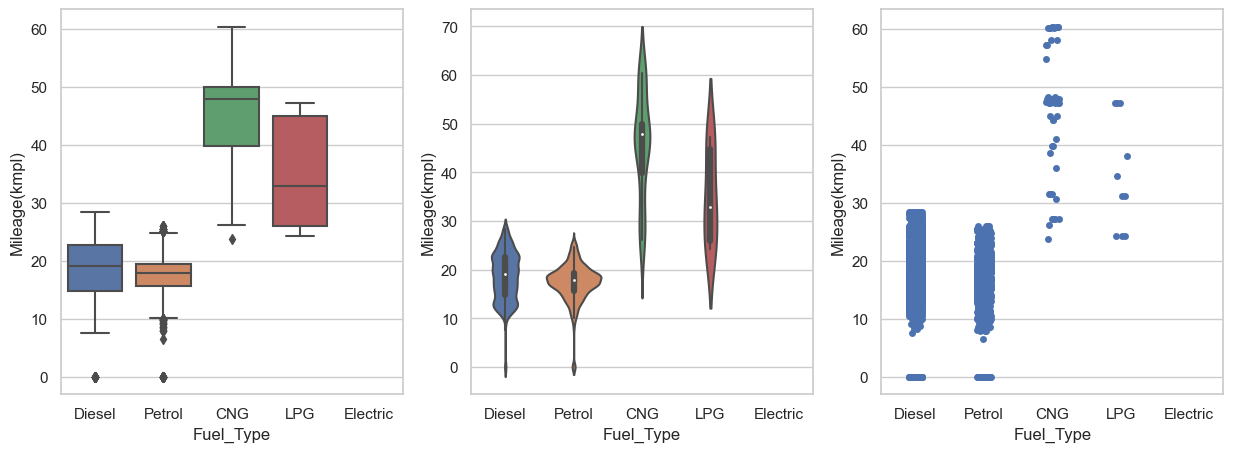

In [56]:
x='Fuel_Type'
y='Mileage(kmpl)'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,2)
sns.violinplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,3)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.show()


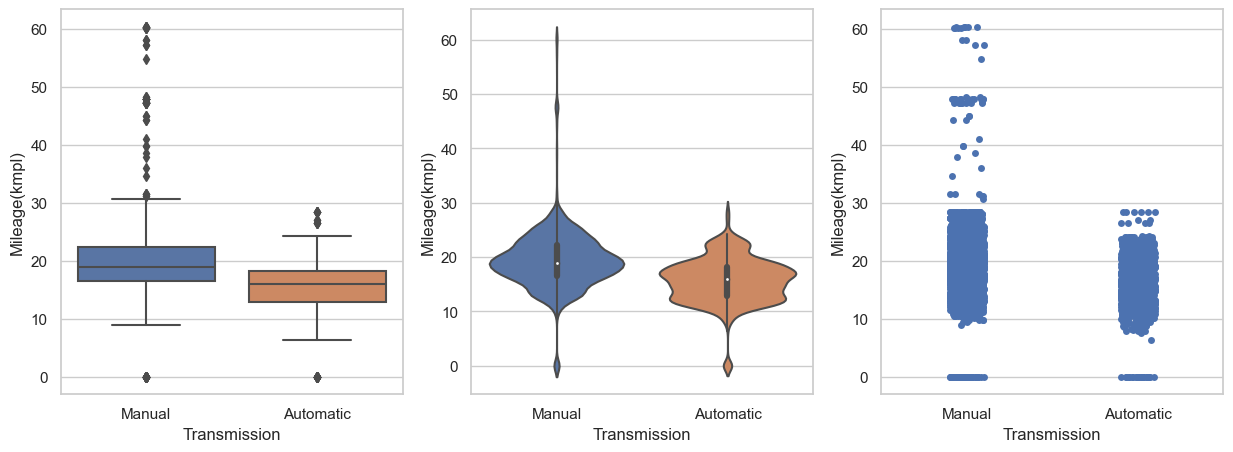

In [57]:
x='Transmission'
y='Mileage(kmpl)'
order=car_train[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,2)
sns.violinplot(x=x,y=y,data=car_train,order=order)
plt.subplot(1,3,3)
sns.stripplot(x=x,y=y,data=car_train,order=order)
plt.show()


## MultiVariate Analysis

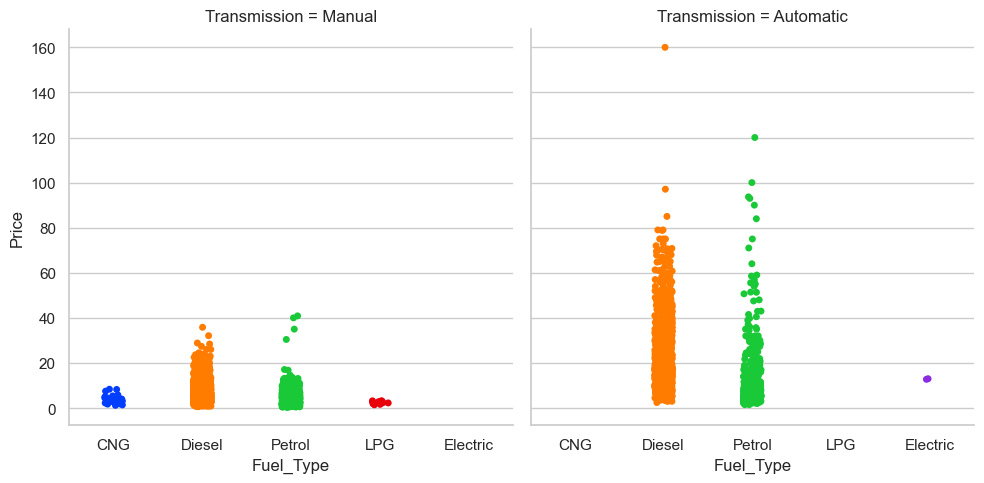

In [58]:
sns.catplot(data=car_train,x='Fuel_Type',y='Price',col='Transmission',palette='bright')

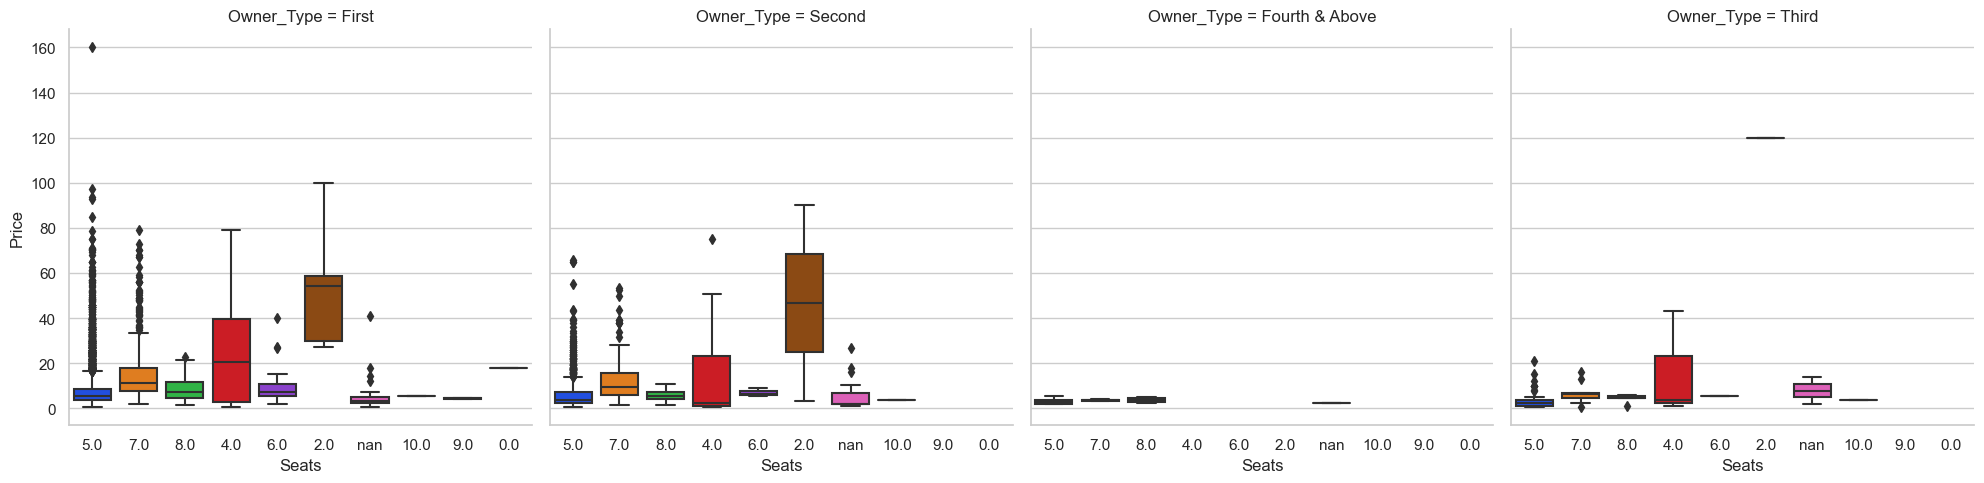

In [59]:
sns.catplot(data=car_train,x='Seats',y='Price',col='Owner_Type',palette='bright',kind='box')

## Data Pre-Processing

In [60]:
car_new=car_train.copy()

In [61]:
car_new.duplicated().sum()

1

In [62]:
car_new.drop_duplicates(ignore_index=True,inplace=True)

In [63]:
car_new.duplicated().sum()

0

In [64]:
car_new.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                   0
Brand                   0
Model                   0
Mileage(kmpl)           2
Power(bhp)            143
Engine(CC)             36
New_Price(Lakhs)     5194
dtype: int64

In [65]:
round(car_new.isnull().sum()/len(car_new)*100,2)

Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Seats                 0.00
Price                 0.00
Brand                 0.00
Model                 0.00
Mileage(kmpl)         0.03
Power(bhp)            2.38
Engine(CC)            0.60
New_Price(Lakhs)     86.31
dtype: float64

In [66]:
car_new.drop(['New_Price(Lakhs)'],axis=1,inplace=True)

- As we have check above with the box plot that Mileage(kmpl), Power(bhp), Engine(CC) contains outliers, so for imputation of Null values we will go by Median.

In [67]:
car_new['Mileage(kmpl)']=car_new['Mileage(kmpl)'].fillna(value=car_new['Mileage(kmpl)'].median())
car_new['Power(bhp)']=car_new['Power(bhp)'].fillna(value=car_new['Power(bhp)'].median())
car_new['Engine(CC)']=car_new['Engine(CC)'].fillna(value=car_new['Engine(CC)'].median())

In [68]:
car_new.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Model                0
Mileage(kmpl)        0
Power(bhp)           0
Engine(CC)           0
dtype: int64

In [69]:
car_new['Seats'].unique()

array(['5.0', '7.0', '8.0', '4.0', '6.0', '2.0', 'nan', '10.0', '9.0',
       '0.0'], dtype=object)

In [70]:
for i in range(len(car_new)):
    if car_new['Seats'][i]=='0.0':
        car_new['Seats'][i]=car_new['Seats'][i].replace('0.0',car_new['Seats'].mode()[0])
    if car_new['Seats'][i]=='nan':
        car_new['Seats'][i]=car_new['Seats'][i].replace('nan',car_new['Seats'].mode()[0])

In [71]:
car_new['Seats'].unique()

array(['5.0', '7.0', '8.0', '4.0', '6.0', '2.0', '10.0', '9.0'],
      dtype=object)

## Outlier Treatment

In [72]:
car_outlier=car_new.copy()

In [73]:
car_outlier.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Brand', 'Model', 'Mileage(kmpl)',
       'Power(bhp)', 'Engine(CC)'],
      dtype='object')

In [74]:
def outlier_removal(data,n):
    for i in data.columns:
        if i=='Price':
            continue
        if data[i].dtype!='O':
            Q1 = data[i].quantile(0.25)
            Q3 = data[i].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit= Q3 + (n*IQR)
            lower_limit=Q1 -(n*IQR)
            for j in range(len(data)):
                if data[i][j]>upper_limit:
                    data[i][j]=upper_limit
                if data[i][j]<lower_limit:
                    data[i][j]=lower_limit
    return data

In [75]:
outlier_removal(car_outlier,1.5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Mileage(kmpl),Power(bhp),Engine(CC)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,29.86,58.16,998.0
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,19.67,126.20,1582.0
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,18.20,88.70,1199.0
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,20.77,88.76,1248.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,15.20,140.80,1968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,Swift,28.40,74.00,1248.0
6014,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,Xcent,24.40,71.00,1120.0
6015,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,Xylo,14.00,112.00,2498.0
6016,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,Wagon,18.90,67.10,998.0


In [76]:
def outlier_check1(col):
    sns.boxplot(x=col,data=car_outlier)
    plt.title("Without Outliers",fontsize=15)

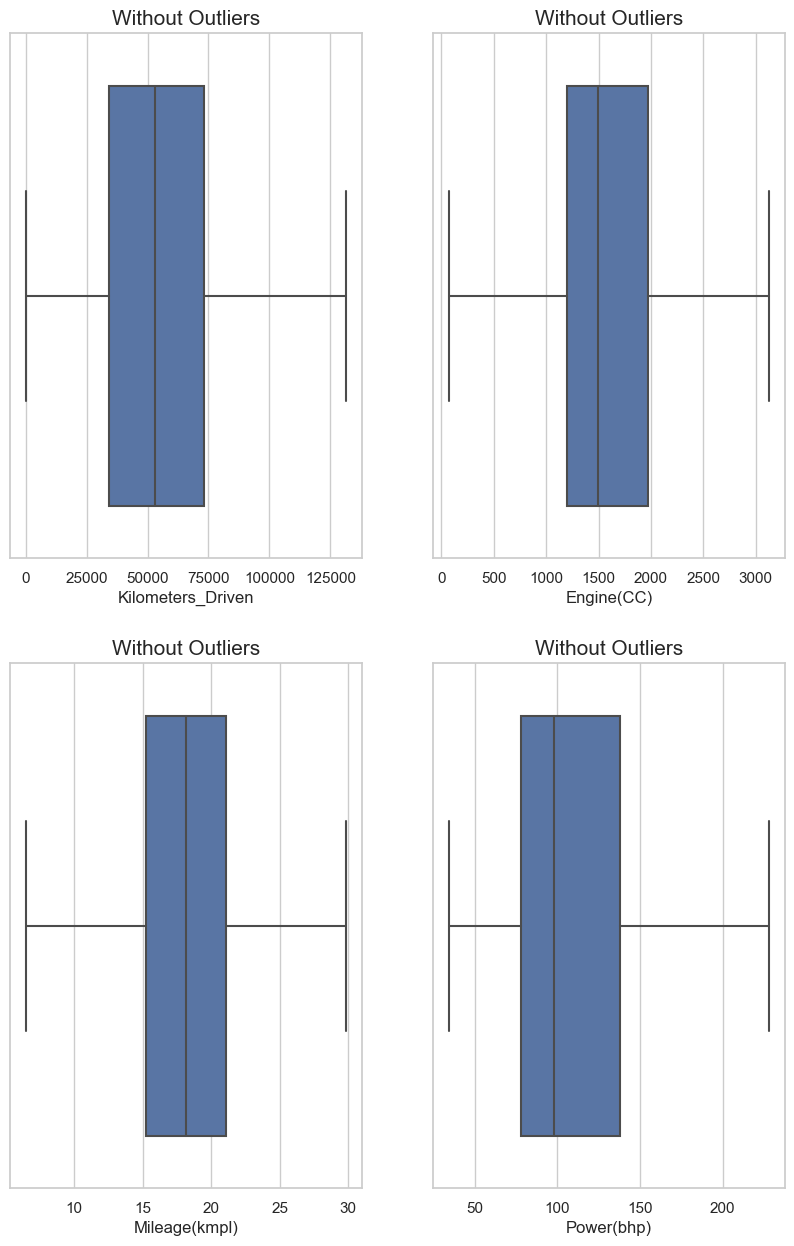

In [77]:
fig=plt.figure(figsize=(10,15))

plt.subplot(2, 2, 1)
outlier_check1('Kilometers_Driven')
plt.subplot(2, 2, 2)
outlier_check1('Engine(CC)')
plt.subplot(2,2,3)
outlier_check1('Mileage(kmpl)')
plt.subplot(2,2,4)
outlier_check1('Power(bhp)')


## Model Building

In [102]:
dataset=car_outlier.copy()

In [103]:
dataset=pd.get_dummies(dataset, columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand', 'Model'],drop_first=True)

In [104]:
dataset.head()

,Year,Kilometers_Driven,Price,Mileage(kmpl),Power(bhp),Engine(CC),Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,2010,72000,1.75,29.86,58.16,998.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,12.50,19.67,126.20,1582.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,4.50,18.20,88.70,1199.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,6.00,20.77,88.76,1248.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,17.74,15.20,140.80,1968.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
x=dataset.drop(["Price"],axis=1)
y=dataset[['Price']]

In [106]:
x.head(2)

,Year,Kilometers_Driven,Mileage(kmpl),Power(bhp),Engine(CC),Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,2010,72000,29.86,58.16,998.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,126.20,1582.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


### Train Test split

In [108]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=53)

In [109]:
LR=LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

In [110]:
y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

In [111]:
y_pred_test

array([[ 8.46110831],
       [ 1.19041161],
       [ 2.78390365],
       ...,
       [ 3.57078278],
       [ 9.53201997],
       [-0.58213803]])

In [112]:
y_test

,Price
4402,6.95
5596,3.75
4192,2.74
5347,10.00
659,23.89
...,...
5419,29.99
3103,1.75
6003,2.20
5543,11.00


<Axes: ylabel='Density'>

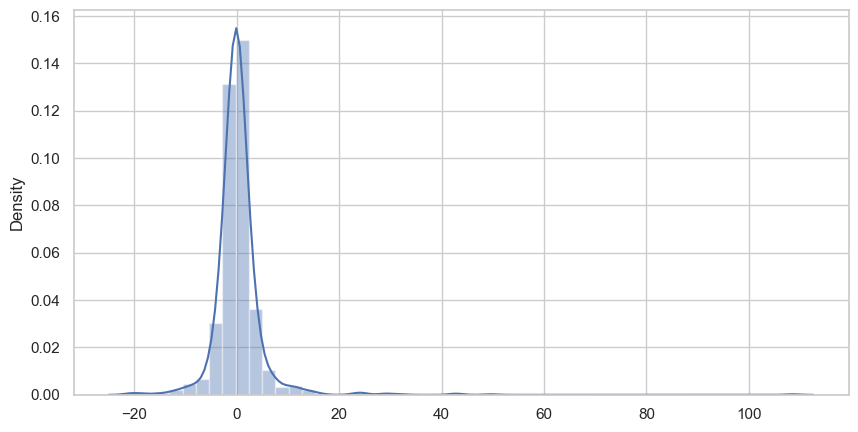

In [113]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-y_pred_test, kde=True)

In [114]:
print("Training:",r2_score(y_train, y_pred_train))
print("Testing:",r2_score(y_test,y_pred_test))

Training: 0.8504295500425199
Testing: 0.7593677349459758


### Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
mse=cross_val_score(LR, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
mse

array([-34.00099987, -21.19399815, -14.3764135 , -23.23744234,
       -27.56094302, -22.8642637 , -18.22699346, -41.41218516,
       -24.81461049, -12.6936461 ])

In [117]:
mse.mean()

-24.03814958014251

## Ridge Regression (L2- Regularozation)

In [118]:
from sklearn.linear_model import Ridge

In [119]:
R_regg =Ridge()

In [120]:
parameters = {"alpha":[1,2,3,4,5,10,15,20,25,30,40,50,60]}

In [121]:
ridge_cv =GridSearchCV(R_regg, 
                       param_grid=parameters,
                       cv=10, 
                       scoring= 'neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50,
                                   60]},
             scoring='neg_mean_squared_error')

In [122]:
ridge_cv.best_params_

{'alpha': 1}

In [123]:
ridge_cv.best_score_

-22.98102978086705

In [124]:
## Taking best parameters
ridge_model = Ridge(alpha=1)

In [125]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=1)

In [126]:
y_pred_train=ridge_model.predict(x_train)
y_pred_test= ridge_model.predict(x_test)

In [127]:
print("Training_R2_Score:", r2_score(y_train,y_pred_train))
print("Testing_R2_Score:", r2_score(y_test,y_pred_test))

Training_R2_Score: 0.8459010473357746
Testing_R2_Score: 0.7983461254609154


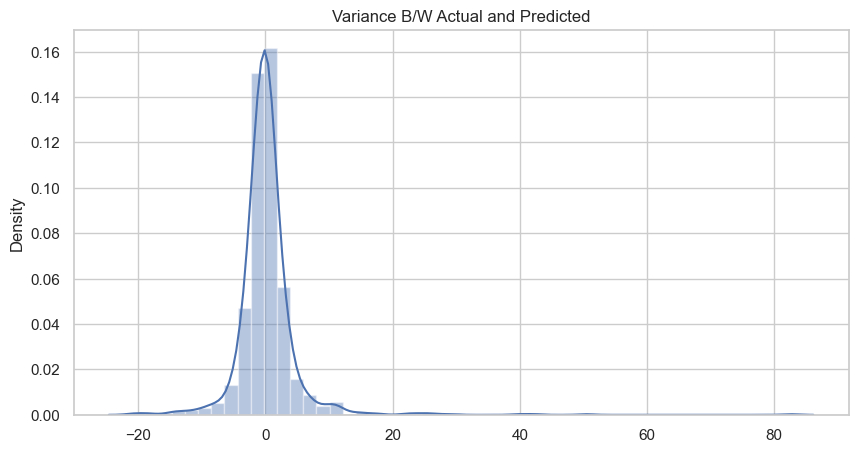

In [128]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-y_pred_test, kde=True)
plt.title("Variance B/W Actual and Predicted")
plt.show()

## Lasso Regression (L1- Regularisation)

In [129]:
from sklearn.linear_model import Lasso
L_regg = Lasso()

In [130]:
parameters = {"alpha":[1,2,3,4,5,10,15,20,25,30,40,50,60]}

In [131]:
lasso_cv = GridSearchCV(L_regg,
                        param_grid=parameters,
                        scoring='neg_mean_squared_error',
                        cv=10)
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50,
                                   60]},
             scoring='neg_mean_squared_error')

In [132]:
lasso_cv.best_params_

{'alpha': 1}

In [133]:
lasso_cv.best_score_

-44.74563313764342

In [134]:
## Taking best parmeters
lasso_model =Lasso()

In [135]:
lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)
y_pred_test = lasso_model.predict(x_test)

print("Train Score:", r2_score(y_train, y_pred_train))
print("Test Score:", r2_score(y_test, y_pred_test))

Train Score: 0.6418644950128243
Test Score: 0.6358975762346692
